# Delhi Metro Network Analysis

In this data analysis project, I anakyze the Delhi Metro Routes dataset. The dataset has 8 columns: Station ID, Station Name, Distance from Start, Line, Opening Date, Station Layout, Latitude and Longitude. I will try to extract some useful insights from the dataset. I am using python and its data analysis and visualization libraries such as pandas, matplotlib, and plotly. 

In [2]:
# importing necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

In [19]:
!pip install folium

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ----------- --------------------------- 30.7/100.0 kB 217.9 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/100.0 kB 409.6 kB/s eta 0:00:01
   ----------------------------------- --- 92.2/100.0 kB 585.1 kB/s eta 0:00:01
   ----------------------------------- --- 92.2/100.0 kB 585.1 kB/s eta 0:00:01
   ----------------------------------- --- 92.2/100.0 kB 585.1 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 302.3 kB/s eta 0:00:00


In [20]:
import folium

In [5]:
# loading the dataset
df = pd.read_csv("Delhi-Metro-Network.csv")

df.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [11]:
# checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64


In [13]:
# checking data types
data_types = df.dtypes
print(data_types)

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object


One thing to note is that the 'Opening Date' is being treated as an object and not date. I’ll convert the Opening Date column to a datetime format for ease of analysis.

In [18]:
df["Opening Date"] = pd.to_datetime(df["Opening Date"])

### Geospatial Analysis of Metro Stations

I will visualize the geographical locations of the metro stations on a map. It will give us an insight into the geographical distribution of the stations across Delhi. I will use the latitude and longitude data to plot each station.

In [39]:
# defining a color scheme for the metro lines
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

delhi_map_with_line_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

# adding colored markers for each metro station with line name in tooltip
for index, row in df.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_map_with_line_tooltip)

# Displaying the updated map
delhi_map_with_line_tooltip

### Analysing Delhi Metro Growth Over Time

I will visualize the number of metro stations opened each year. This will give us insight into the pace of expansion of delhi metro's network.


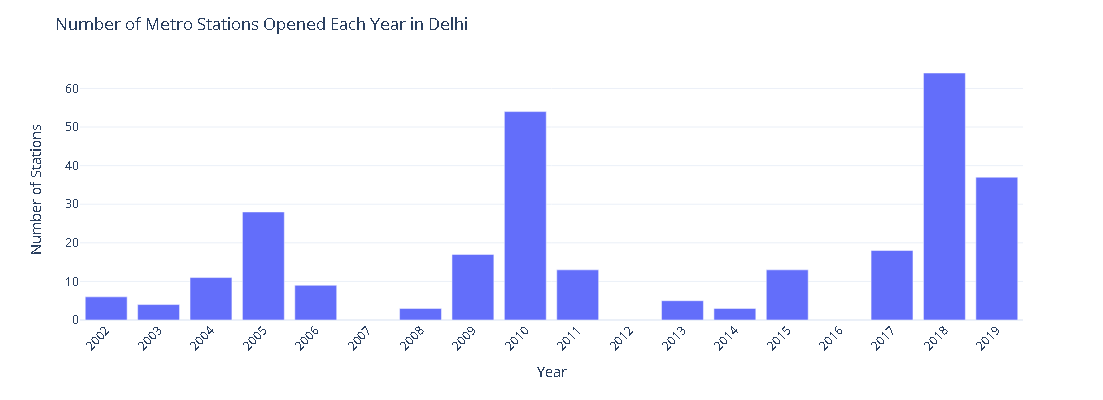

In [74]:
# extracting year from opening dates
df['opening_year'] = df['Opening Date'].dt.year

# extracting the number of metro stations opened each year
stn_per_year = df['opening_year'].value_counts()
stn_per_year_df = stn_per_year.reset_index()
stn_per_year_df.columns = ['Year', 'Number of Stations']

fig = px.bar(stn_per_year_df, x="Year", y="Number of Stations")
fig.update_layout(
    title="Number of Metro Stations Opened Each Year in Delhi", xaxis_tickangle=-45, xaxis=dict(tickmode='linear'),
    width=800,  # Width in pixels
    height=400
)
fig.show()

### Analysis of Metro Lines

I will analyse the number of stations and the average distance between stations on each line.

In [91]:
# extracting the number of stations on each line
stn_per_line = df["Line"].value_counts()

# calculating the total distance of different lines
total_distance = df.groupby('Line')['Distance from Start (km)'].max()

# calculating abg distance per line
avg_distance = total_distance/(stn_per_line-1)

line_df = pd.DataFrame({
    'Line': stn_per_line.index,
    'Number of Stations': stn_per_line.values,
    'Average Distance Between Stations (km)': avg_distance
})

# sorting the DataFrame by the number of stations
line_df = line_df.sort_values(by='Number of Stations', ascending=False)

line_df.reset_index(drop=True, inplace=True)
line_df.head()

,Line,Number of Stations,Average Distance Between Stations (km)
0,Blue line,49,1.355000
1,Pink line,38,1.097917
2,Yellow line,37,1.157143
3,Voilet line,34,1.950000
4,Red line,29,1.240000


The table presents a detailed analysis of the Delhi Metro lines, including the number of stations on each line and the average distance between stations.

To better understand these metrics, let’s visualize them. I’ll create two plots: one for the number of stations per line and another for the average distance between stations. It will provide a comparative view of the metro lines:


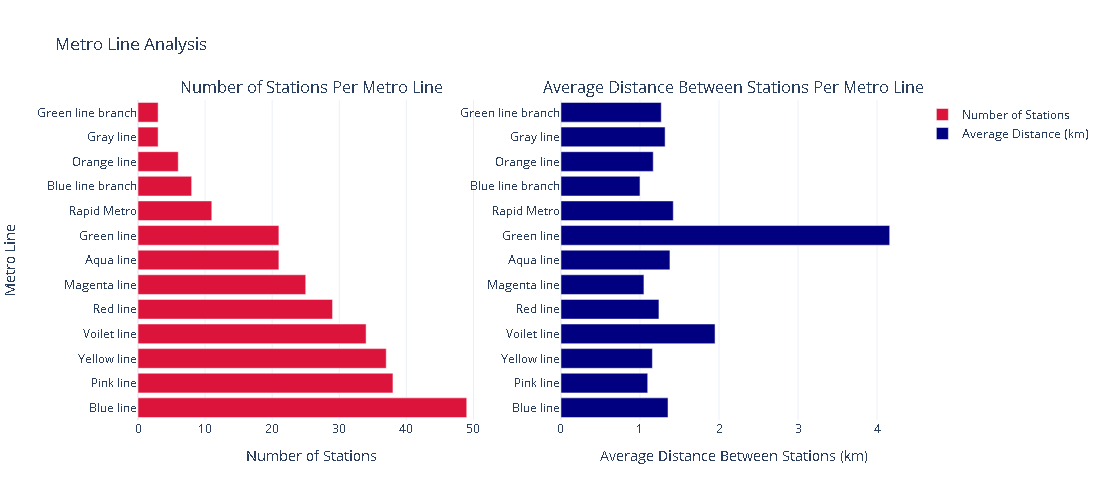

In [100]:
# creating subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Number of Stations Per Metro Line', 'Average Distance Between Stations Per Metro Line'))


# plot for Number of Stations per Line
fig.add_trace(
    go.Bar(y=line_df["Line"], x=line_df["Number of Stations"], orientation="h", name="Number of Stations", 
    marker_color='crimson'), row=1, col=1)

# plot for Average Distance Between Stations
fig.add_trace(
    go.Bar(y=line_df['Line'], x=line_df['Average Distance Between Stations (km)'],
           orientation='h', name='Average Distance (km)', marker_color='navy'),
    row=1, col=2
)

# update xaxis properties
fig.update_xaxes(title_text="Number of Stations", row=1, col=1)
fig.update_xaxes(title_text="Average Distance Between Stations (km)", row=1, col=2)

# update yaxis properties
fig.update_yaxes(title_text="Metro Line", row=1, col=1)
fig.update_yaxes(title_text="", row=1, col=2)

fig.update_layout(height=500, width=1200, title_text="Metro Line Analysis", template="plotly_white")
fig.show()

### Station Layout Analysis

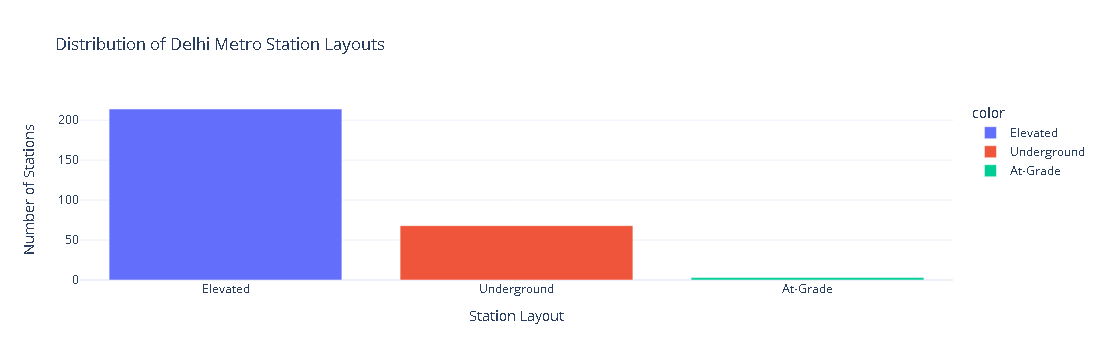

In [102]:
layout_counts = df["Station Layout"].value_counts()

fig = px.bar(x=layout_counts.index, y=layout_counts.values, labels={"x":'Station Layout', "y":'Number of Stations'},
            title='Distribution of Delhi Metro Station Layouts',
             color=layout_counts.index,
             color_continuous_scale='pastel')

fig.update_layout(xaxis_title="Station Layout",
                  yaxis_title="Number of Stations",
                  coloraxis_showscale=False,
                  template="plotly_white")

fig.show()

#### Observations:

- 
Elevated Stations: The majority of the stations are Elevated. It is a common design choice in urban areas to save space and reduce land acquisition issues


Underground Stations: The Underground stations are fewer compared to elevated ones. These are likely in densely populated or central areas where abo e-ground construction is less feasib.

ns.

At Grade Stations: There are only a few At-Grade (ground level) stations, suggesting they are less common in the network, possibly due to land and traffic considerations.